In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score



In [2]:
df_m=pd.read_excel("Mushroom.xlsx")
df_m

,Class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veiltype,veil-color,ring-number,ring-type,spore-print-color,population:,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
df_m.isnull().sum()

Class                        0
cap-shape                    0
cap-surface                  0
cap-color                    0
bruises                      0
odor                         0
 gill-attachment             0
gill-spacing                 0
gill-size                    0
gill-color                   0
stalk-shape                  0
stalk-root                   0
stalk-surface-above-ring     0
 stalk-surface-below-ring    0
stalk-color-above-ring       0
stalk-color-below-ring       0
 veiltype                    0
veil-color                   0
ring-number                  0
 ring-type                   0
spore-print-color            0
population:                  0
habitat                      0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
for col in df_m.columns:
    le=LabelEncoder()
    df_m[col]=le.fit_transform(df_m[col])

In [5]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Class                      8124 non-null   int32
 1   cap-shape                  8124 non-null   int32
 2   cap-surface                8124 non-null   int32
 3   cap-color                  8124 non-null   int32
 4   bruises                    8124 non-null   int32
 5   odor                       8124 non-null   int32
 6    gill-attachment           8124 non-null   int32
 7   gill-spacing               8124 non-null   int32
 8   gill-size                  8124 non-null   int32
 9   gill-color                 8124 non-null   int32
 10  stalk-shape                8124 non-null   int32
 11  stalk-root                 8124 non-null   int32
 12  stalk-surface-above-ring   8124 non-null   int32
 13   stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring  

In [6]:
df_m.describe()

,Class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veiltype,veil-color,ring-number,ring-type,spore-print-color,population:,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [7]:
df_m.head(20)

,Class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veiltype,veil-color,ring-number,ring-type,spore-print-color,population:,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,...,2,7,7,0,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,3,3


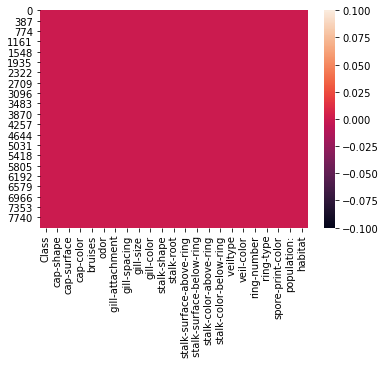

In [8]:
sns.heatmap(df_m.isnull())

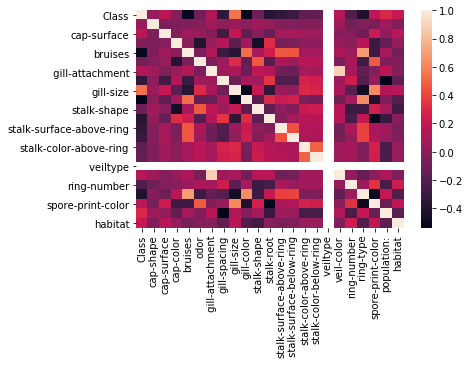

In [9]:
sns.heatmap(df_m.corr())

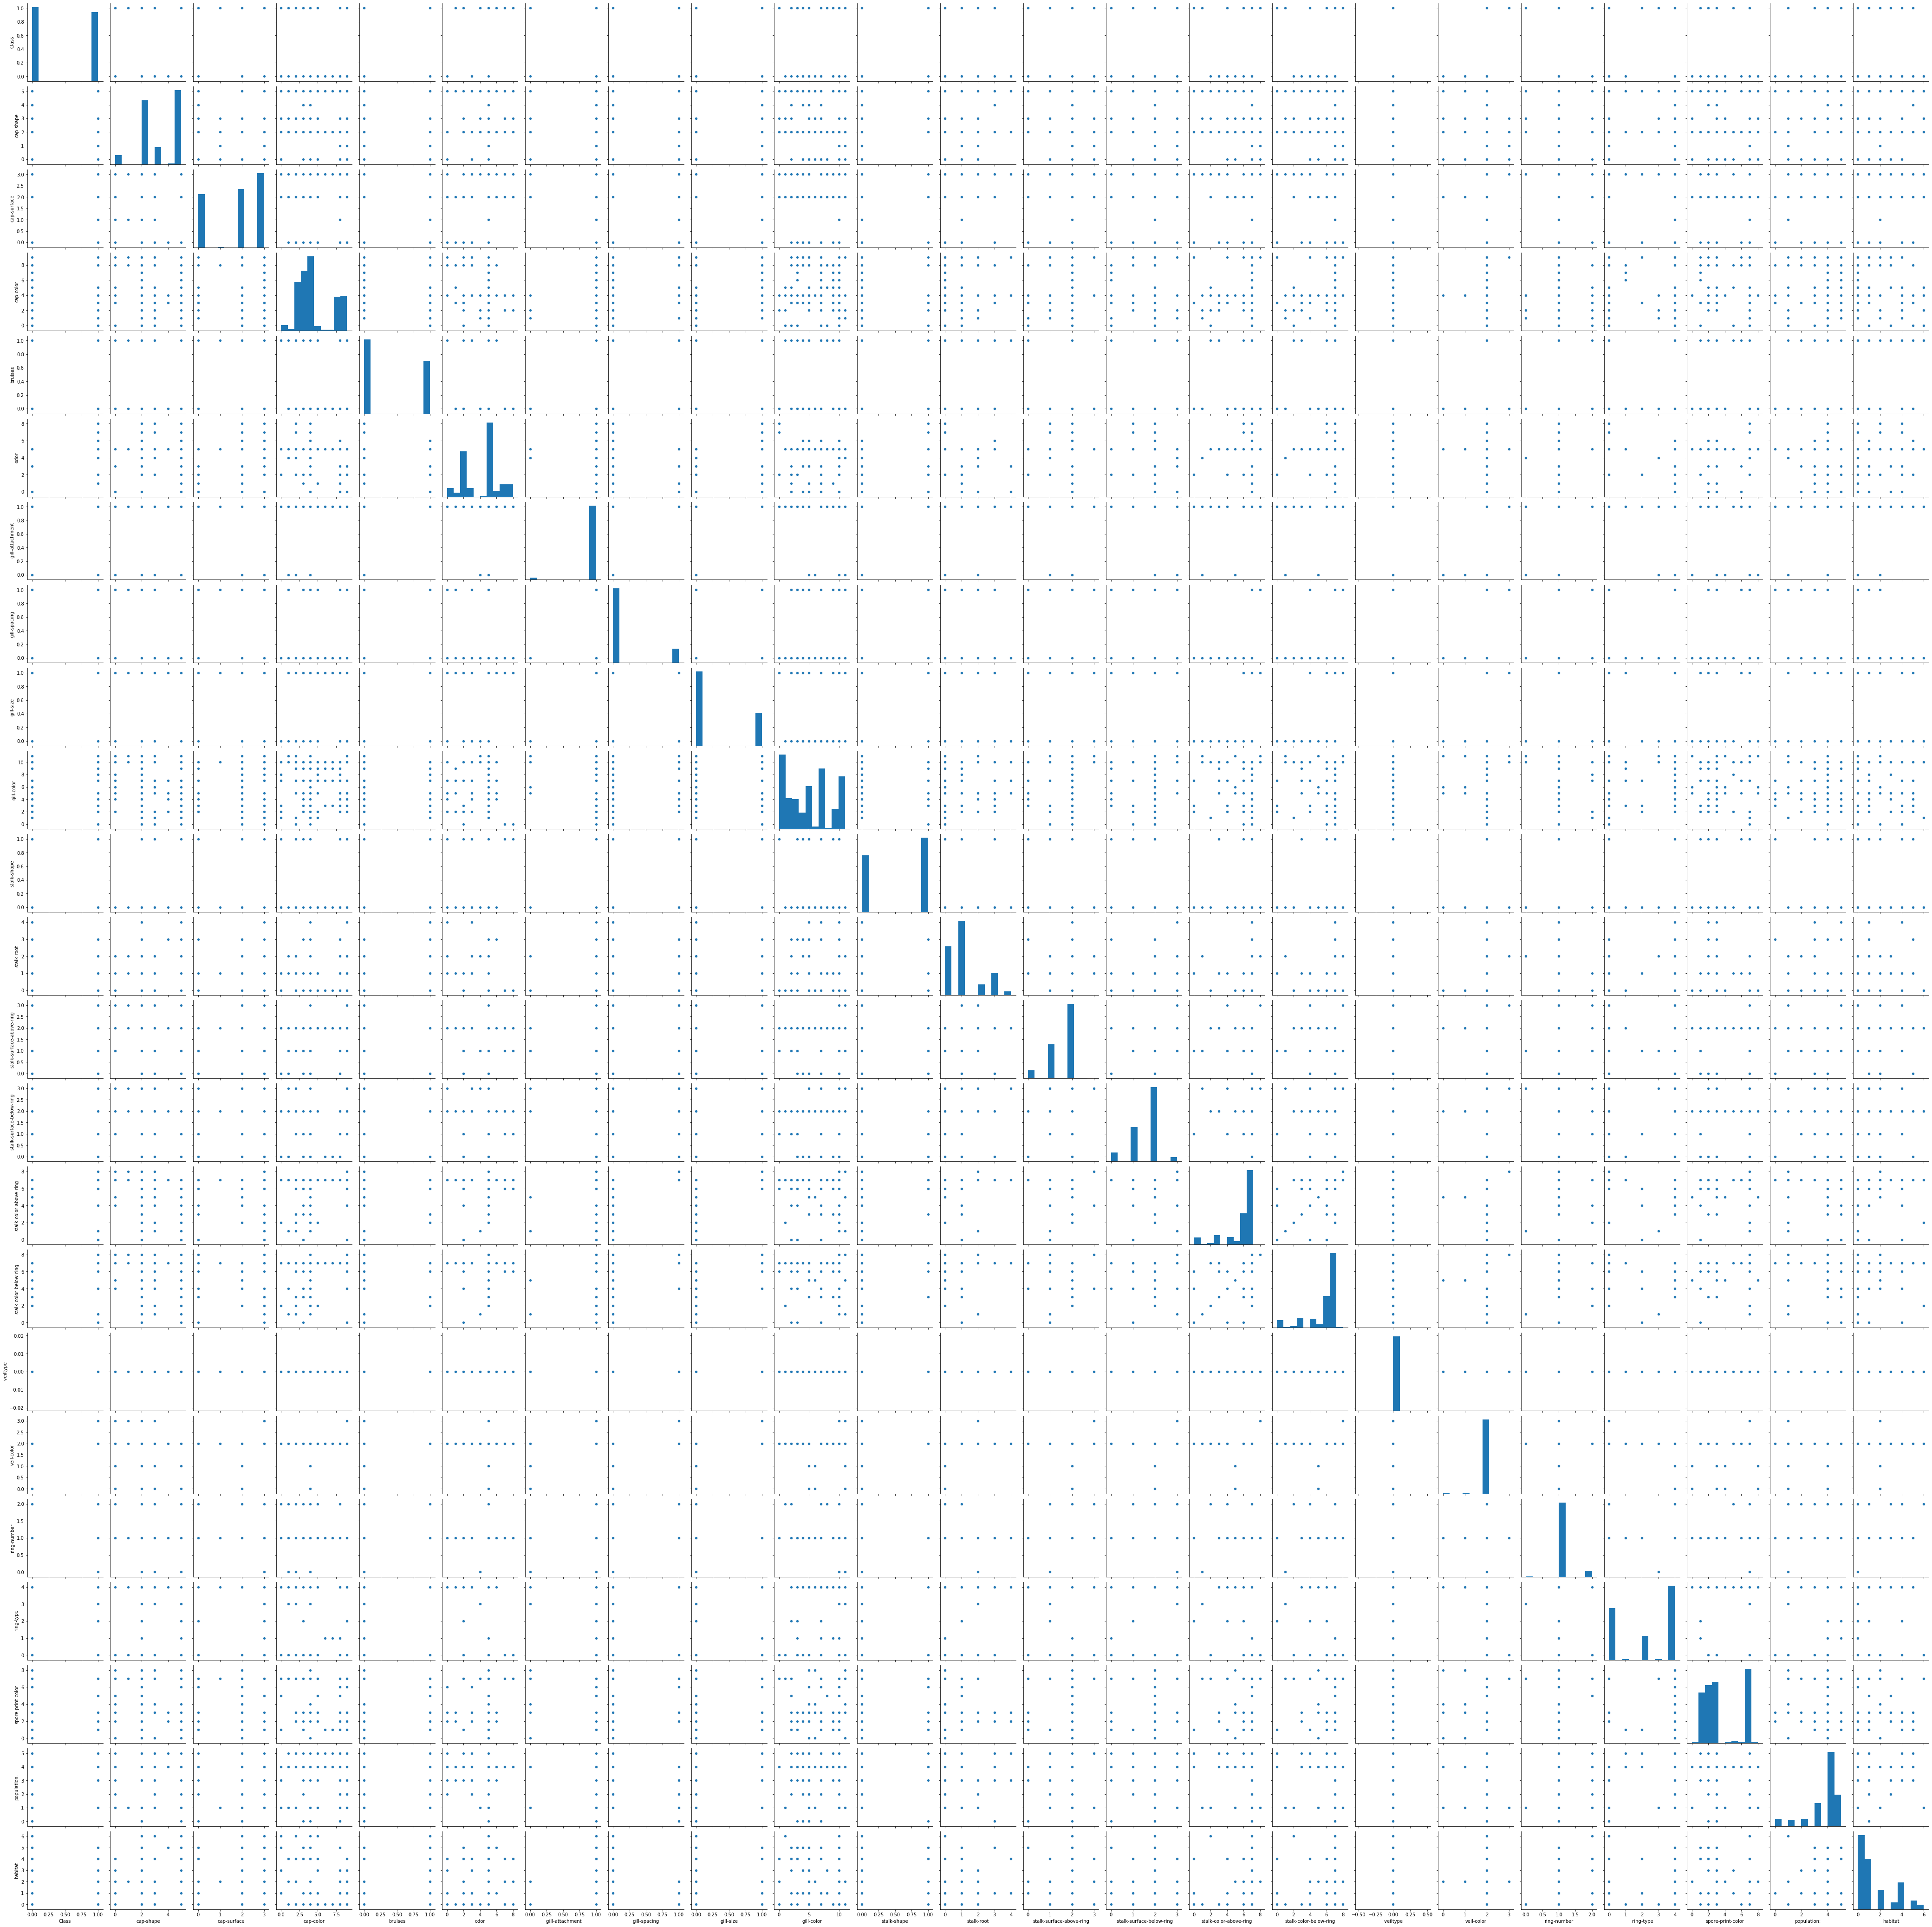

In [10]:
sns.pairplot(df_m)

In [11]:
#dropping vieltype column as it is common all the rows
df_m=df_m.drop(df_m.columns[-7], axis=1)

In [12]:
df_x=df_m.drop("Class",axis=1)
df_y=df_m["Class"]

In [13]:
df_y.value_counts()

0    4208
1    3916
Name: Class, dtype: int64

In [14]:
for i in df_x.columns:
    df_x[i].value_counts()

In [15]:
df_x.apply(pd.Series.value_counts)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population:,habitat
0,452.0,2320.0,168.0,4748.0,400.0,210.0,6812.0,5612.0,1728,3516.0,...,552.0,600.0,432.0,432.0,96.0,36.0,2776.0,48.0,384.0,3148.0
1,4.0,4.0,44.0,3376.0,192.0,7914.0,1312.0,2512.0,96,4608.0,...,2372.0,2304.0,36.0,36.0,96.0,7488.0,48.0,1632.0,340.0,2148.0
2,3152.0,2556.0,1500.0,NaN,2160.0,NaN,NaN,NaN,752,NaN,...,5176.0,4936.0,96.0,96.0,7924.0,600.0,1296.0,1872.0,400.0,832.0
3,828.0,3244.0,1840.0,NaN,400.0,NaN,NaN,NaN,732,NaN,...,24.0,284.0,576.0,576.0,8.0,NaN,36.0,1968.0,1248.0,292.0
4,32.0,NaN,2284.0,NaN,36.0,NaN,NaN,NaN,408,NaN,...,NaN,NaN,448.0,512.0,NaN,NaN,3968.0,48.0,4040.0,1144.0
5,3656.0,NaN,144.0,NaN,3528.0,NaN,NaN,NaN,1048,NaN,...,NaN,NaN,192.0,192.0,NaN,NaN,NaN,72.0,1712.0,368.0
6,NaN,NaN,16.0,NaN,256.0,NaN,NaN,NaN,64,NaN,...,NaN,NaN,1872.0,1872.0,NaN,NaN,NaN,48.0,NaN,192.0
7,NaN,NaN,16.0,NaN,576.0,NaN,NaN,NaN,1492,NaN,...,NaN,NaN,4464.0,4384.0,NaN,NaN,NaN,2388.0,NaN,NaN
8,NaN,NaN,1040.0,NaN,576.0,NaN,NaN,NaN,24,NaN,...,NaN,NaN,8.0,24.0,NaN,NaN,NaN,48.0,NaN,NaN
9,NaN,NaN,1072.0,NaN,NaN,NaN,NaN,NaN,492,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


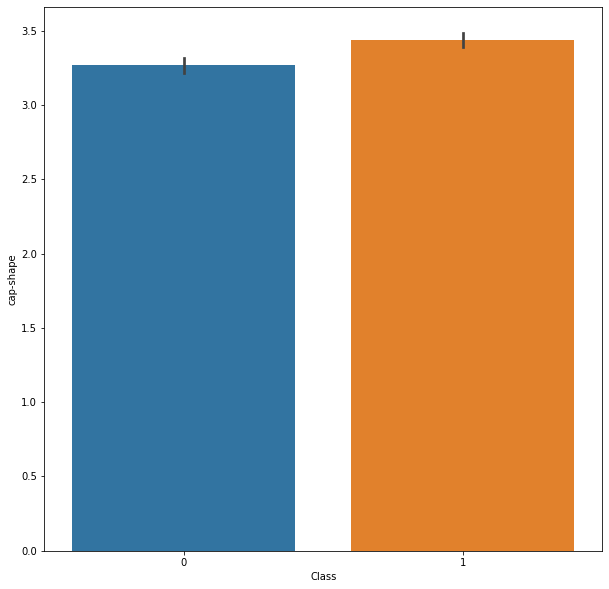

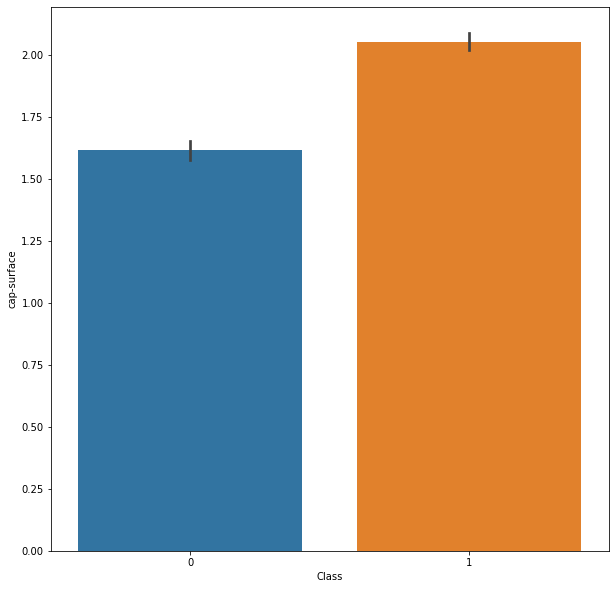

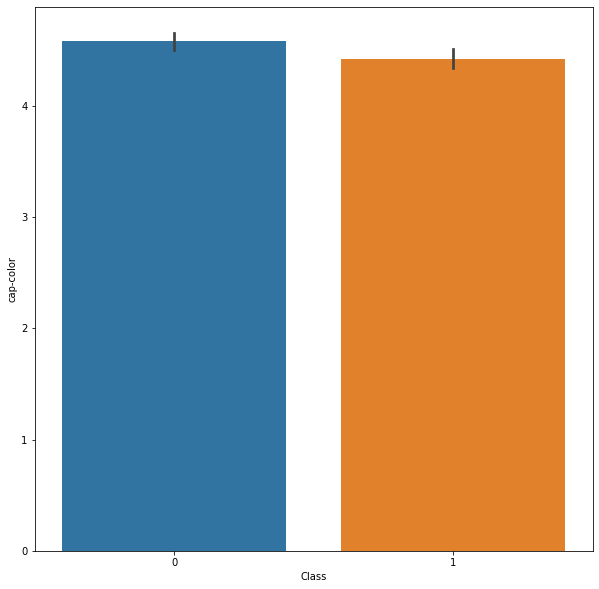

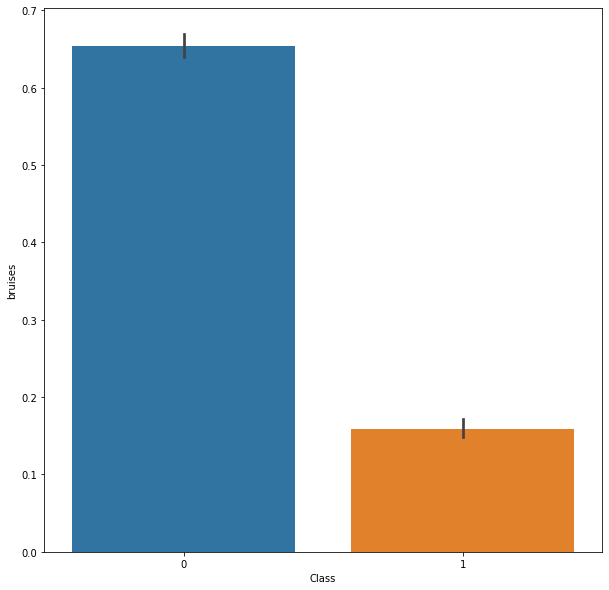

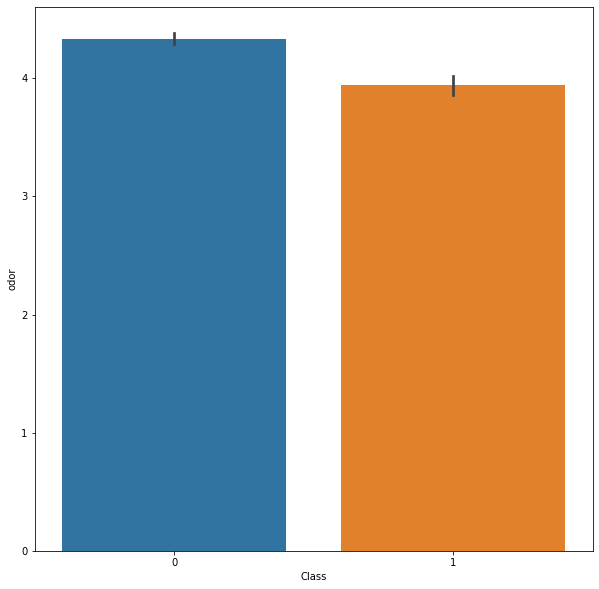

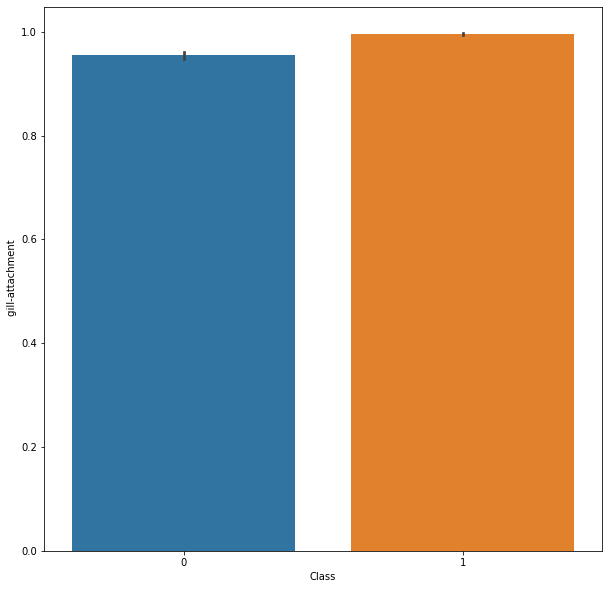

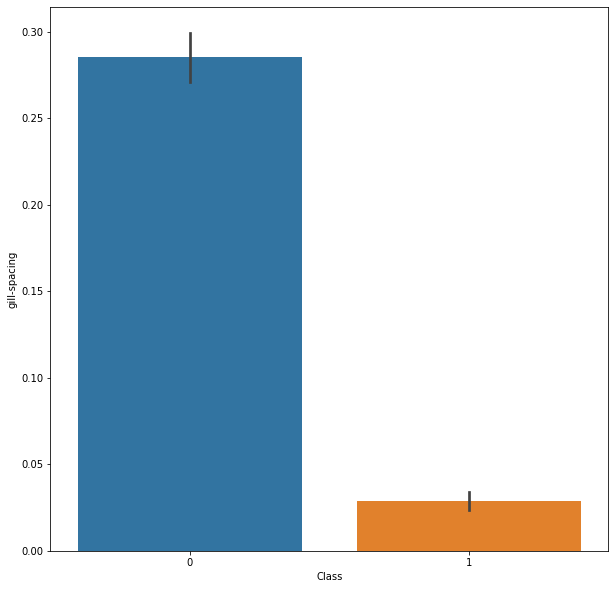

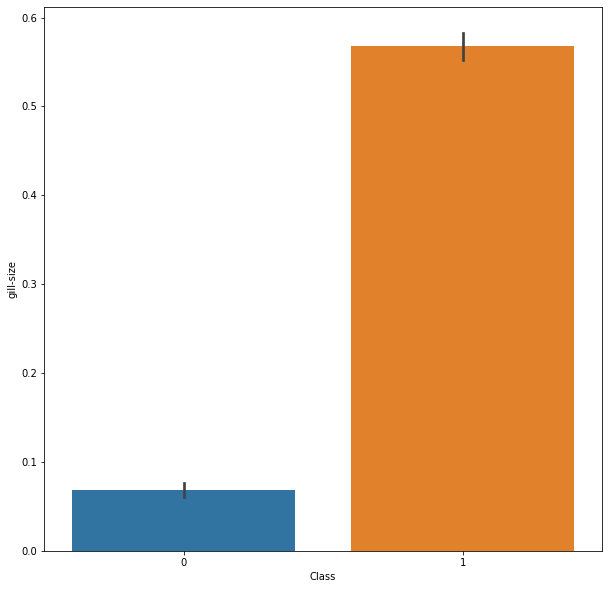

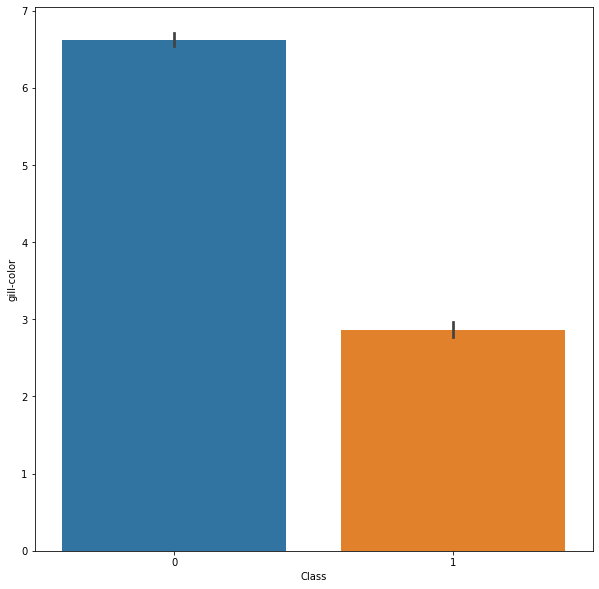

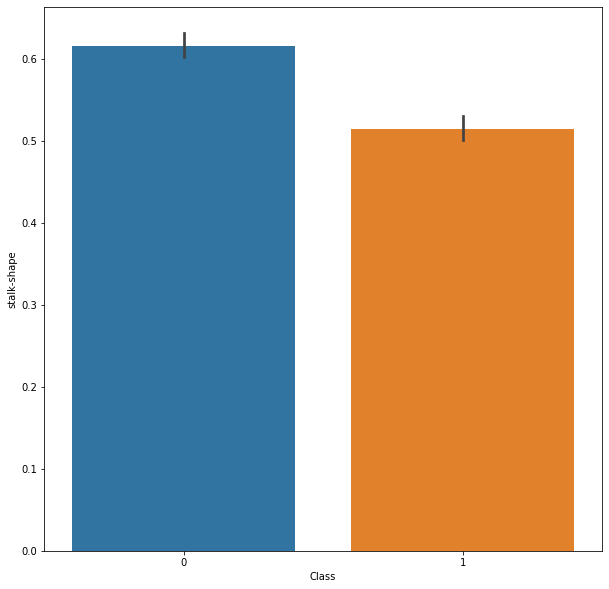

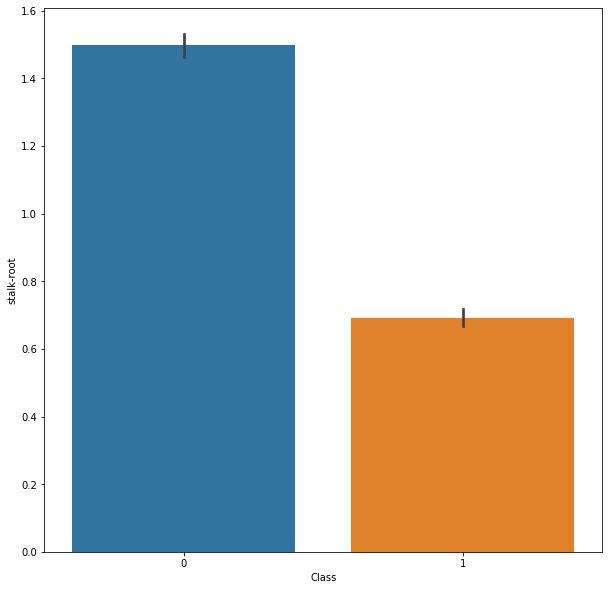

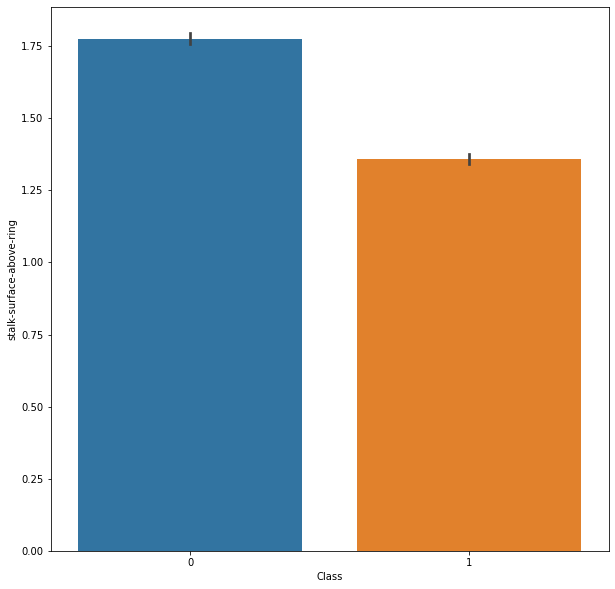

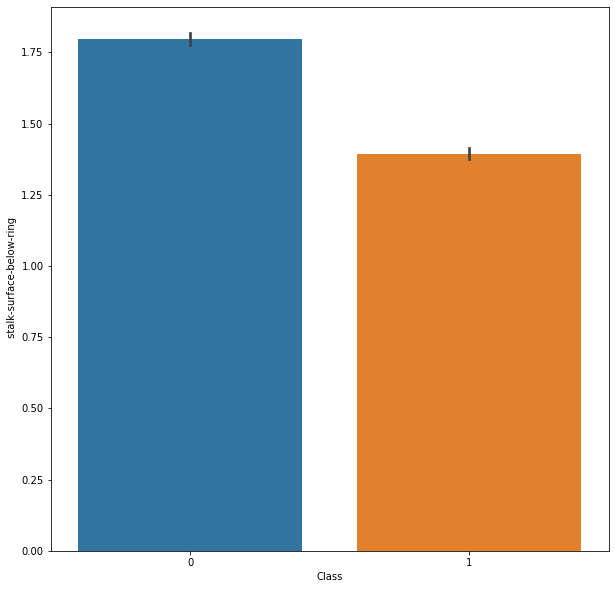

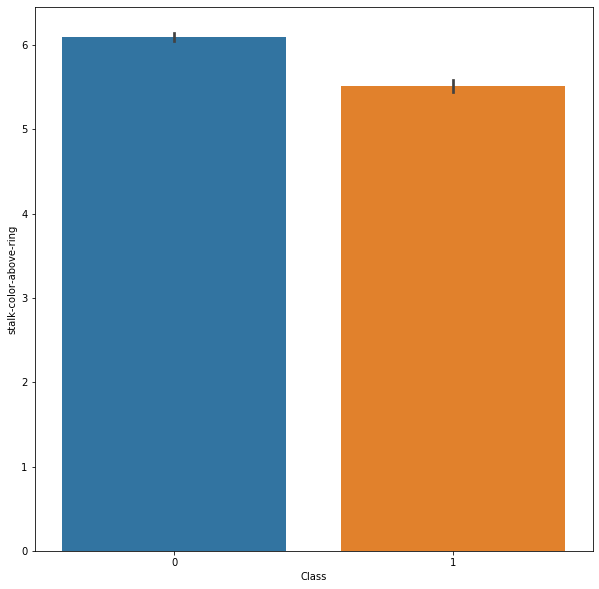

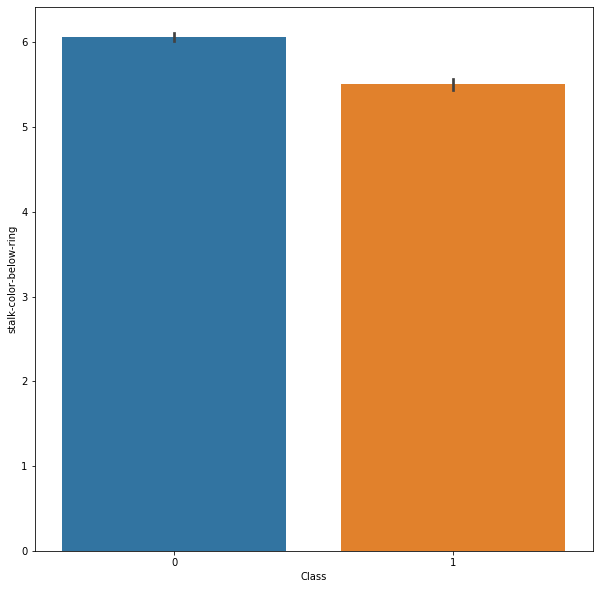

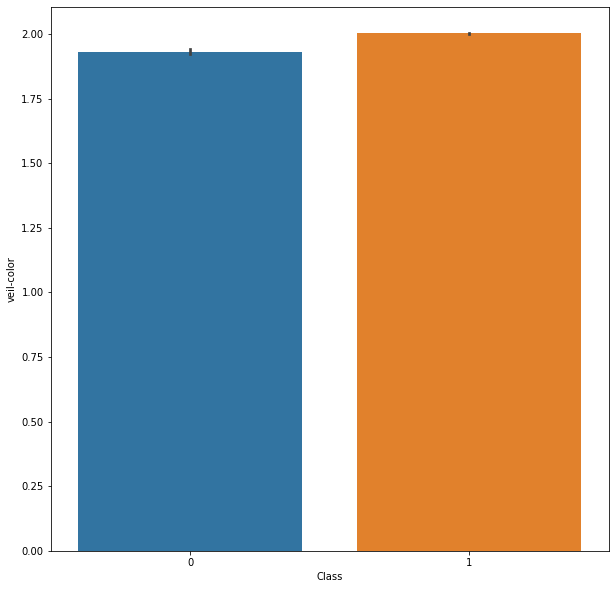

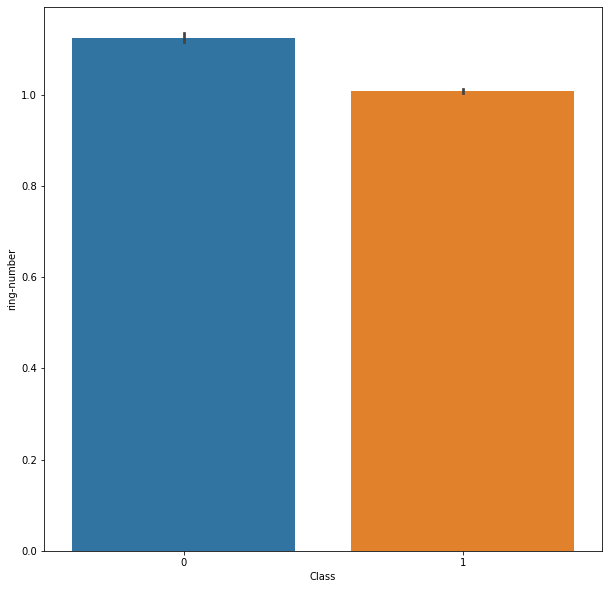

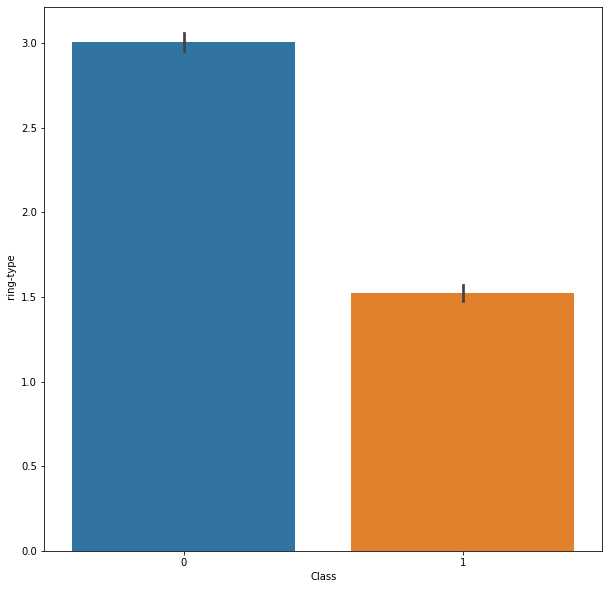

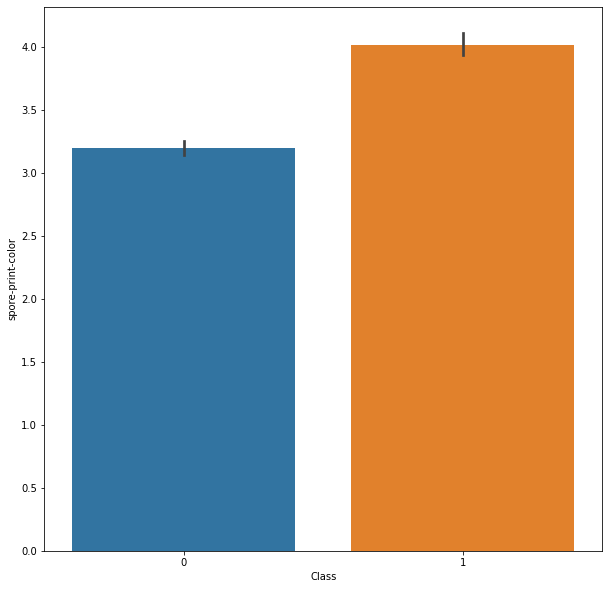

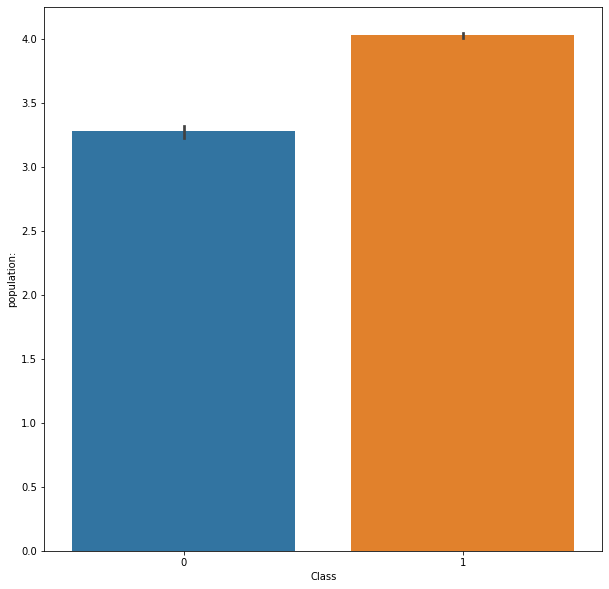

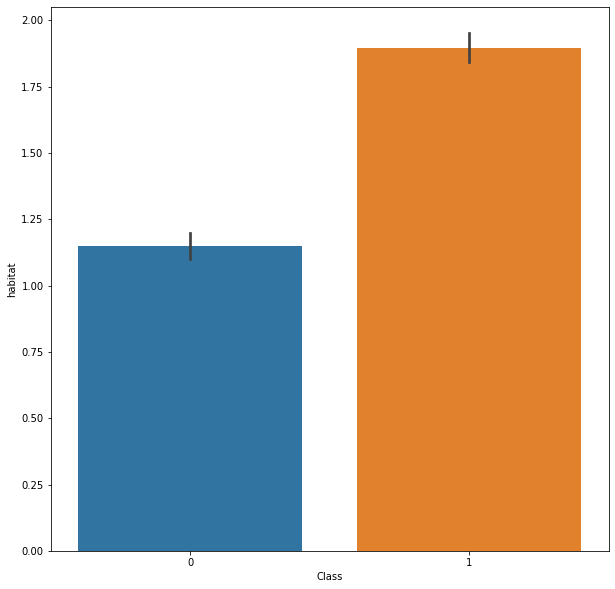

In [16]:
for col in df_x.columns:
    plt.figure(figsize=(10,10))
    sns.barplot(y=col,x='Class',data=df_m)

In [17]:
# Scaling the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sx=scaler.fit_transform(df_x)
x=pd.DataFrame(data=sx,columns=df_x.columns)

In [18]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population:,habitat
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,-0.216992,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,0.683778,0.586385,-0.429288,-0.416681,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8120,1.029712,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,0.683778,0.586385,-0.429288,-0.416681,-8.100146,-0.256132,0.948081,-1.509643,0.284330,0.285710
8121,-0.840343,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,0.053477,-1.144806,...,0.683778,0.586385,-0.429288,-0.416681,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8122,-0.216992,0.953270,-0.198250,-0.843230,1.832689,0.162896,-0.438864,1.494683,-1.358896,0.873511,...,0.683778,-0.893053,0.622441,0.631991,0.142037,-0.256132,-1.272216,1.428426,0.284330,0.285710


In [19]:
y=df_y
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: Class, Length: 8124, dtype: int32

In [20]:
def alg(alg,x,y):
    m_score=0
    for r in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r,test_size=.22)
        alg.fit(x_train,y_train)
        pred=alg.predict(x_test)
        a_scr=accuracy_score(pred,y_test)
        if a_scr>m_score:
            m_score=a_scr
            final_state=r
    print()
    print("maximum score",alg," at random state:",final_state," = ",m_score)
    return final_state

In [21]:
# Algorithms
models = [LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier() ,GaussianNB(),SVC(),RandomForestClassifier(),GradientBoostingClassifier()]
for m in models:
    alg(m,x,y)


maximum score LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)  at random state: 88  =  0.9670022371364653

maximum score KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')  at random state: 42  =  1.0

maximum score DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
 

In [22]:
# now select one of a best model  
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.22)
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print("accuracy score: ",accuracy_score(pred,y_test))
print("confusion matrix : \n\n",confusion_matrix(pred,y_test))
print("\nclassification report \n ",classification_report(pred,y_test))

accuracy score:  1.0
confusion matrix : 

 [[929   0]
 [  0 859]]

classification report 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00       929
           1       1.00      1.00      1.00       859

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



In [23]:
auc_roc=roc_auc_score(y_test,pred)
auc_roc

1.0

In [24]:
y_pred_prob=rfc.predict_proba(x_test)[:,1]

In [26]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob )
roc_auc = auc(fpr, tpr)
roc_auc

1.0

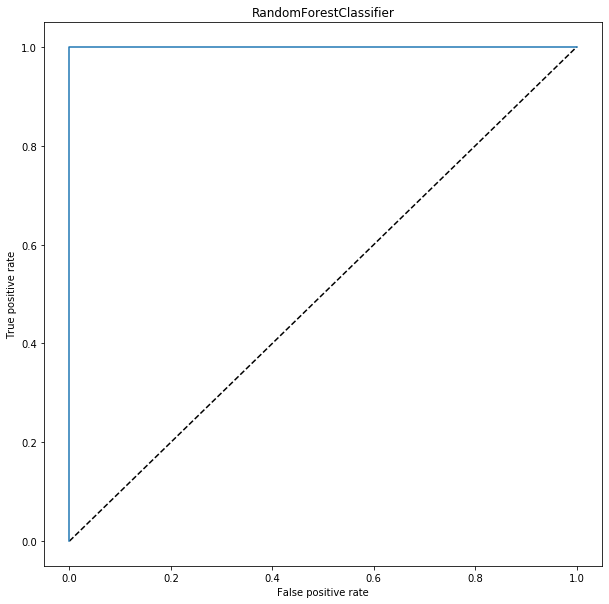

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()

In [28]:
from sklearn.model_selection import cross_val_score
Rfc=RandomForestClassifier()
print("mean score for RandomForestClassifier",cross_val_score(Rfc,x,y,cv=5,scoring="accuracy").mean())
print("STD score for RandomForestClassifier",cross_val_score(Rfc,x,y,cv=5,scoring="accuracy").std())

mean score for RandomForestClassifier 0.8934923076923077
STD score for RandomForestClassifier 0.14499890781859598


## saving the model

In [29]:
from sklearn.externals import joblib
joblib.dump(rfc,"rfc.mushroomdata.pkl")

['rfc.mushroomdata.pkl']